<a href="https://colab.research.google.com/github/Sirilak-1447/229352-StatisticalLearning/blob/main/660510777_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [3]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [5]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [6]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

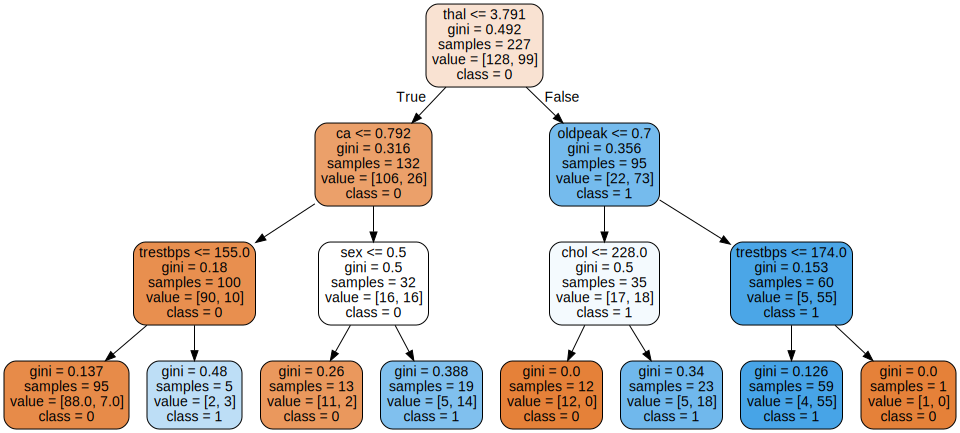

In [7]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [8]:
data.columns[:-1] #ชื่ิอตัวแปรต้นต่างๆ

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [9]:
clf = DecisionTreeClassifier()

In [10]:
from sklearn.metrics import classification_report
bagged_trees = BaggingClassifier(estimator=clf, n_estimators=100, max_samples=0.8)

bagged_trees.fit(X_train, y_train)
print(classification_report(y_test,bagged_trees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.74      0.80      0.77        40

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [11]:
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test,forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        36
           1       0.77      0.82      0.80        40

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [12]:
from sklearn.metrics import f1_score, accuracy_score

**Decision tree**

In [18]:
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', DecisionTreeClassifier(random_state=42))
])

dt_params = {
    'clf__max_depth': [3, 6, 9, 12],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt_pipeline, dt_params, scoring='f1_macro', cv=5)
dt_grid.fit(X_train, y_train)

y_pred_dt = dt_grid.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Macro:", f1_score(y_test, y_pred_dt, average='macro'))


Decision Tree
Accuracy: 0.6578947368421053
F1 Macro: 0.6557491289198607


**Bagged Decision Trees**

In [19]:
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', DecisionTreeClassifier(random_state=42))
])

dt_params = {
    'clf__max_depth': [3, 6, 9, 12],
    'clf__min_samples_split': [2, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(dt_pipeline, dt_params, scoring='f1_macro', cv=5)
dt_grid.fit(X_train, y_train)

y_pred_dt = dt_grid.predict(X_test)


print("Bagged Trees")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("F1 Macro:", f1_score(y_test, y_pred_dt, average='macro'))


Bagged Trees
Accuracy: 0.6578947368421053
F1 Macro: 0.6557491289198607


**Random Forest**

In [20]:
rf_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('clf', RandomForestClassifier(random_state=42))
])

rf_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [5, 10, None],
    'clf__max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(rf_pipeline, rf_params, scoring='f1_macro', cv=5)
rf_grid.fit(X_train, y_train)

y_pred_rf = rf_grid.predict(X_test)

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1 Macro:", f1_score(y_test, y_pred_rf, average='macro'))


Random Forest
Accuracy: 0.7894736842105263
F1 Macro: 0.788888888888889


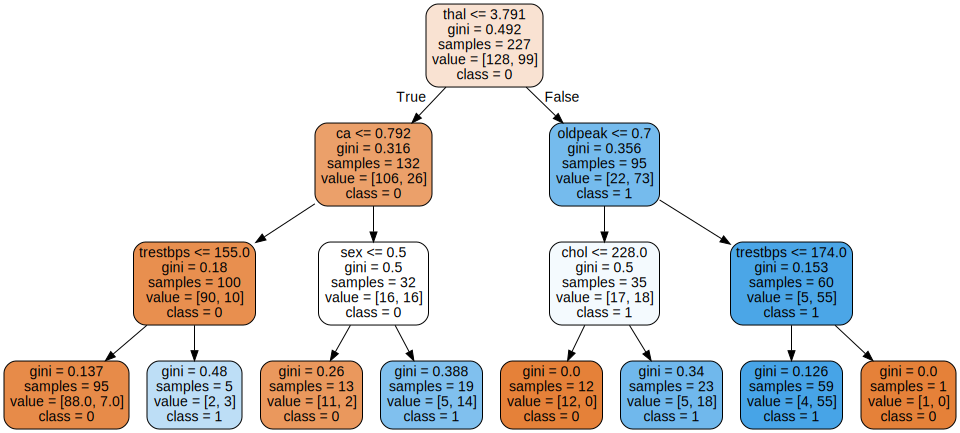

In [21]:
best_tree = dt_grid.best_estimator_.named_steps['clf']
dot_data = export_graphviz(best_tree,
                           out_file=None,
                           feature_names=data.columns[:-1],
                           class_names=["0", "1"],
                           filled=True, rounded=True)

graphviz.Source(dot_data)



**ตอบ** โมเดลที่ดีที่สุดคือ Random Forest ซึ่งให้ค่า Accuracy อยู่ที่ 78.95% และ F1 Macro เท่ากับ 0.7841 โดยใช้ต้นไม้จำนวน 200 ต้น และจำกัดความลึกสูงสุดไว้ที่ 6